## Let’s look at the steps that we will follow in this course.

1.Problem Statement
2.Hypothesis Generation
3.Getting the system ready and loading the data
4.Understanding the data
5.Exploratory Data Analysis (EDA)
   Univariate Analysis
   Bivariate Analysis
6.Missing value and outlier treatment
7.Evaluation Metrics for classification problems
8.Model Building : Part I
9.Logistic Regression using stratified k-folds cross validation
10.Feature Engineering
11.Model Building : Part II
   Logistic Regression
   Decision tree
   Random Forest
   XGBoost


# Problem statement:
    Dream Housing Finance company deals in all home loans. They have presence across all urban, semi urban and
    rural areas. Customer first apply for home loan after that company validates the customer eligibility for loan.
    Company wants to automate the loan eligibility process (real time) based on customer detail provided while
    filling online application form. These details are Gender, Marital Status, Education, Number of Dependents, 
    Income, Loan Amount, Credit History and others. To automate this process, they have given a problem to identify 
    the customers segments, those are eligible for loan amount so that they can specifically target these customers.

# What is hypothesis generation?
This is a very important stage in any data science/machine learning pipeline. It involves understanding the
problem in detail by brainstorming as many factors as possible which can impact the outcome. It is done by 
understanding the problem statement thoroughly and before looking at the data.

Below are some of the factors which I think can affect the Loan Approval (dependent variable for this loan prediction
problem):

Salary: Applicants with high income should have more chances of loan approval.
Previous history: Applicants who have repayed their previous debts should have higher chances of loan approval.
Loan amount: Loan approval should also depend on the loan amount. If the loan amount is less, chances of loan approval
should be high.
Loan term: Loan for less time period and less amount should have higher chances of approval.
EMI: Lesser the amount to be paid monthly to repay the loan, higher the chances of loan approval.
These are some of the factors which i think can affect the target variable, you can come up with many more factors.

In [29]:
#Loading packages:

import pandas as pd 
import numpy as np                     # For mathematical calculations 
import seaborn as sns                  # For data visualization 
import matplotlib.pyplot as plt        # For plotting graphs 
%matplotlib inline 
import warnings                        # To ignore any warnings 
warnings.filterwarnings("ignore")

In [30]:
#Reading data
train=pd.read_csv("C:\\Data Science\\Projects\\Loan Prediction-Analytics Vidhya\\train_loan.csv") 
test=pd.read_csv("C:\\Data Science\\Projects\\Loan Prediction-Analytics Vidhya\\test_loan.csv") 

#Let’s make a copy of train and test data so that even if we have to make any changes in these datasets we would not
#lose the original datasets.

train_original=train.copy() 
test_original=test.copy()


In [31]:
print(train.columns)
print(test.columns)


Index(['Loan_ID', 'Gender', 'Married', 'Dependents', 'Education',
       'Self_Employed', 'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Property_Area', 'Loan_Status'],
      dtype='object')
Index(['Loan_ID', 'Gender', 'Married', 'Dependents', 'Education',
       'Self_Employed', 'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Property_Area'],
      dtype='object')


# Variable	Description
Loan Id	            Unique Loan ID
Gender	            Male/ Female
Married             Applicant married (Y/N)
Dependents	        Number of dependents
Education	        Applicant Education (Graduate/Under Graduate)
Self_Employed	    Self employed (Y/N)
ApplicantIncome	    Applicant income
CoapplicantIncome	Coapplicant income
LoanAmount	     Loan amount in thousands
Loan_Amount_Term Term of loan in months
Credit_History	 Credit history meets guidelines
Property_Area	 Urban/ Semi Urban/ Rural
Loan_Status      Loan approved (Y/N)

In [32]:
train.dtypes

Loan_ID               object
Gender                object
Married               object
Dependents            object
Education             object
Self_Employed         object
ApplicantIncome        int64
CoapplicantIncome    float64
LoanAmount           float64
Loan_Amount_Term     float64
Credit_History       float64
Property_Area         object
Loan_Status           object
dtype: object

In [33]:
print(train.shape)
print(test.shape)

(614, 13)
(367, 12)


# Target Variable: Loan_Status Frequency table
print(train.Loan_Status.value_counts())
print("\n",train.Loan_Status.value_counts(normalize=True))  #proportions

#Bar chart
train.Loan_Status.value_counts().plot.bar()

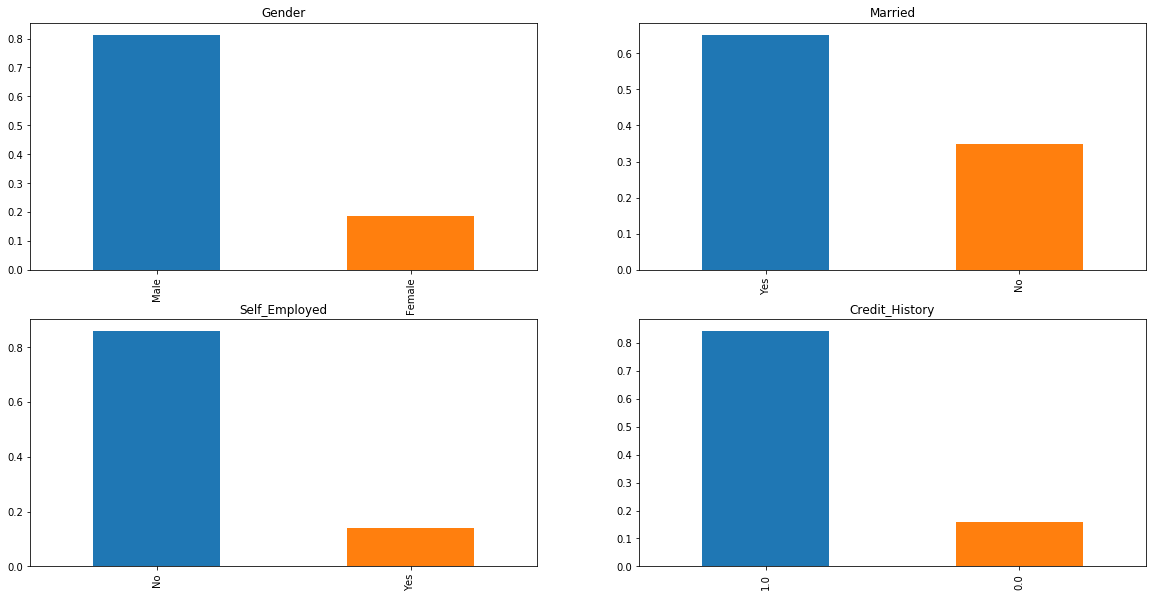

In [34]:
# Let us visualize Independent variable (categorical) separately
plt.figure(1)
plt.subplot(221)
train['Gender'].value_counts(normalize=True).plot.bar(figsize=(20,10), title= 'Gender') 

plt.subplot(222)
train['Married'].value_counts(normalize=True).plot.bar(title= 'Married') 

plt.subplot(223)
train['Self_Employed'].value_counts(normalize=True).plot.bar(title= 'Self_Employed') 

plt.subplot(224) 
train['Credit_History'].value_counts(normalize=True).plot.bar(title= 'Credit_History') 
plt.show()

# Observations from the above charts
It can be inferred from the above bar plots that:

80% applicants in the dataset are male.
Around 65% of the applicants in the dataset are married.
Around 15% applicants in the dataset are self employed.
Around 85% applicants have repaid their debts.


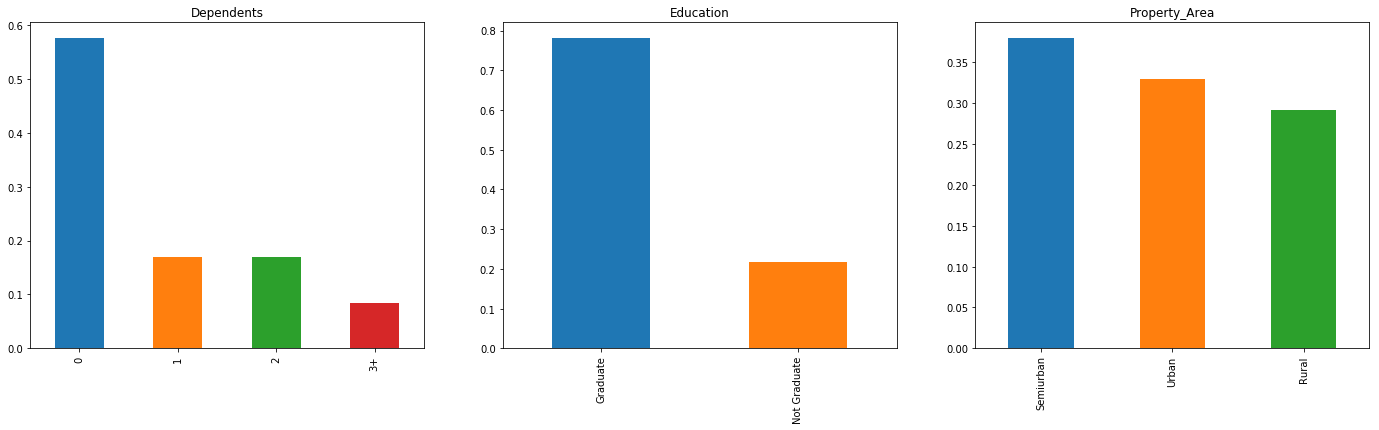

In [35]:
# Independent Variable (Ordinal)
plt.figure(1) 
plt.subplot(131)
train['Dependents'].value_counts(normalize=True).plot.bar(figsize=(24,6), title= 'Dependents') 

plt.subplot(132)
train['Education'].value_counts(normalize=True).plot.bar(title= 'Education') 

plt.subplot(133)
train['Property_Area'].value_counts(normalize=True).plot.bar(title= 'Property_Area') 
plt.show()

## Following inferences can be made from the above bar plots:

Most of the applicants don’t have any dependents.
Around 80% of the applicants are Graduate.
Most of the applicants are from Semiurban area.

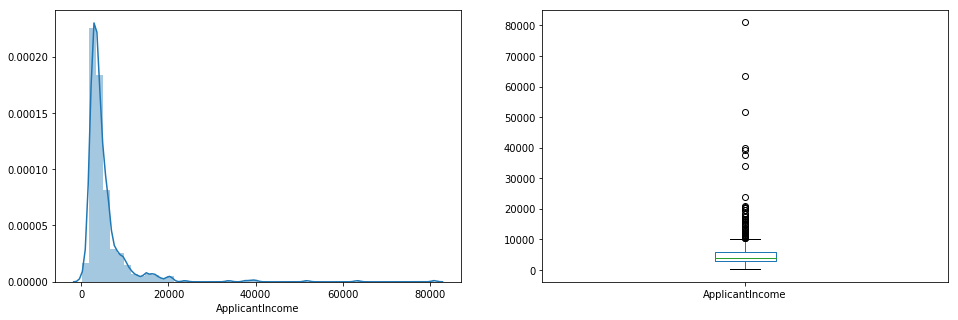

In [36]:
# Independent variables numeric: Applicant Income
plt.figure(1) 
plt.subplot(121) 
sns.distplot(train['ApplicantIncome'])

plt.subplot(122) 
train['ApplicantIncome'].plot.box(figsize=(16,5)) 
plt.show()

# distribution of applicant income is to the left which means it is NOT normally distributed. we will try to make it 
# as normal in later sections as algorithms work better if the data is normally distributed

The boxplot confirms the presence of a lot of outliers/extreme values. This can be attributed to the income
disparity in the society. Part of this can be driven by the fact that we are looking at people with different
education levels. Let us segregate them by Education:

Text(0.5,0.98,'')

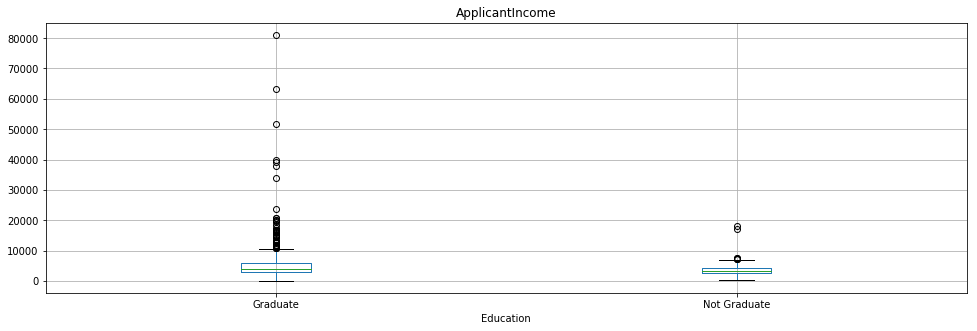

In [37]:
train.boxplot(column="ApplicantIncome",by="Education",figsize=(16,5))  #segregate the boxplot by education
plt.suptitle("")  #suppress the super title


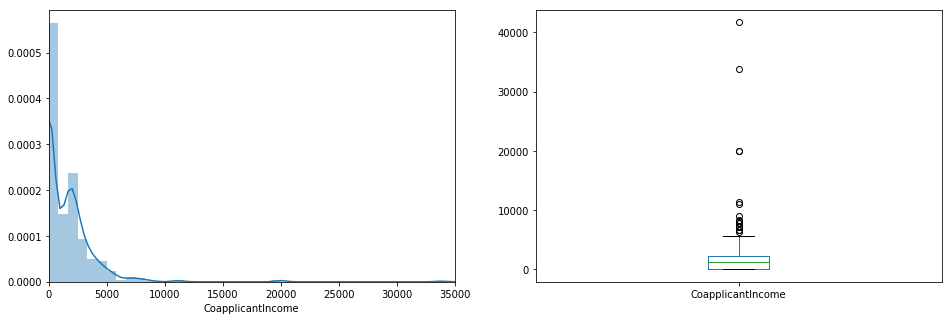

In [38]:
###Let us look at co-applicant income distribution

plt.figure(1) 
plt.subplot(121)
plt.xlim(0,35000)
sns.distplot(train['CoapplicantIncome'])  #Majority of coapplicant’s income ranges from 0 to 5000. 

plt.subplot(122) 
train['CoapplicantIncome'].plot.box(figsize=(16,5)) 
plt.show()

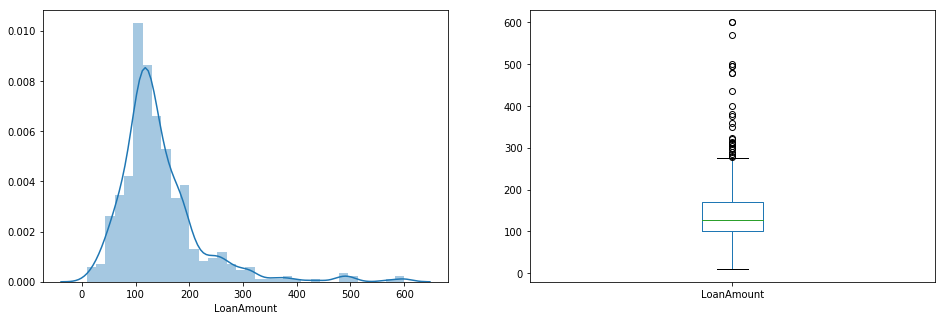

Skweness:  ApplicantIncome      6.917027
CoapplicantIncome    5.881622
LoanAmount           2.361437
Loan_Amount_Term    -2.333710
Credit_History      -2.013253
dtype: float64
Kurtosis:  ApplicantIncome      74.063152
CoapplicantIncome    57.658049
LoanAmount            8.502723
Loan_Amount_Term      6.362722
Credit_History        2.061763
dtype: float64


In [39]:
# Let us look at the distribution of loan amount variable

plt.figure(1)
plt.subplot(121)
df=train.dropna()  #distplot will error out if there are missing values...
sns.distplot(df['LoanAmount'])

plt.subplot(122) 
df['LoanAmount'].plot.box(figsize=(16,5)) 
plt.show()
print("Skweness: ",df.skew())
print("Kurtosis: ",df.kurtosis())


### We see a lot of outliers in the above variable. Look at it Kurtosis of 8.502723.
# Distribution is fairly normal.



### Bivariate analysis. We will see how each of these independent features correlate with Loan Status

## Lets recall some of the hypotheses that we generated earlier:

Applicants with high income should have more chances of loan approval.
Applicants who have repaid their previous debts should have higher chances of loan approval.
Loan approval should also depend on the loan amount. If the loan amount is less, chances of loan approval should be high.
Lesser the amount to be paid monthly to repay the loan, higher the chances of loan approval.
Lets try to test the above mentioned hypotheses using bivariate analysis

After looking at every variable individually in univariate analysis, we will now explore them again with respect to the target variable.

Loan_Status,N,Y
Gender,,
Female,37,75
Male,150,339


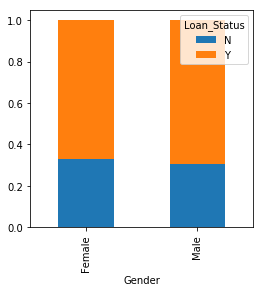

In [40]:
# Categorical Independent variable vs Target variable

Gender=pd.crosstab(train['Gender'],train['Loan_Status']) 

#proportion of male and female applicants is more or less same for both 
#approved and unapproved loans...observe this after the plot
Gender.div(Gender.sum(1).astype(float), axis=0).plot(kind="bar", stacked=True, figsize=(4,4))

Gender

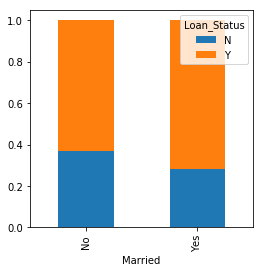

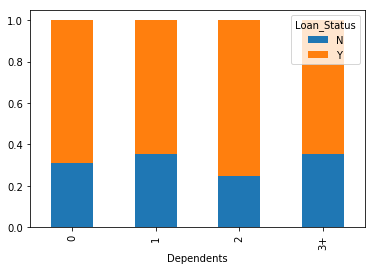

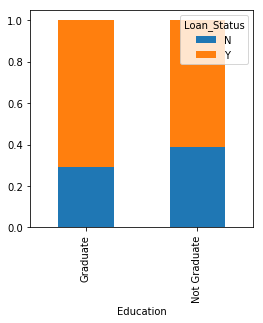

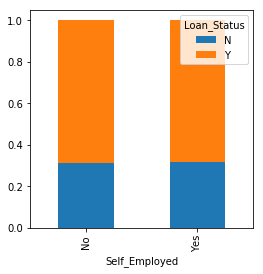

In [41]:
#Now let us visualize the remaining categorical variables vs target variables.

Married=pd.crosstab(train['Married'],train['Loan_Status'])
Dependents=pd.crosstab(train['Dependents'],train['Loan_Status'])
Education=pd.crosstab(train['Education'],train['Loan_Status']) 
Self_Employed=pd.crosstab(train['Self_Employed'],train['Loan_Status'])

Married.div(Married.sum(1).astype(float), axis=0).plot(kind="bar", stacked=True, figsize=(4,4)) 
#plt.show() 
Dependents.div(Dependents.sum(1).astype(float), axis=0).plot(kind="bar", stacked=True)
#plt.show() 
Education.div(Education.sum(1).astype(float), axis=0).plot(kind="bar", stacked=True, figsize=(4,4)) 
#plt.show() 
Self_Employed.div(Self_Employed.sum(1).astype(float), axis=0).plot(kind="bar", stacked=True, figsize=(4,4))
plt.show()

### Observations from the above charts
Proportion of married applicants is higher for the approved loans.
Distribution of applicants with 1 or 3+ dependents is similar across both the categories of Loan_Status.
There is nothing significant we can infer from Self_Employed vs Loan_Status plot.

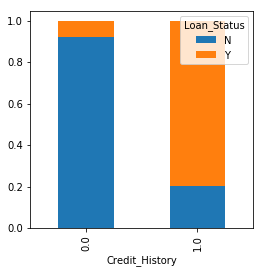

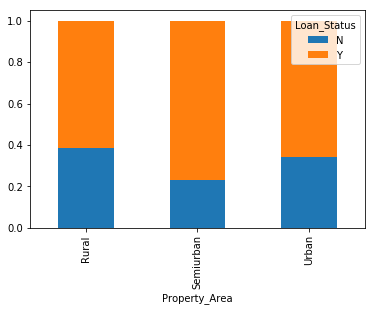

In [42]:
### Now we will look at the relationship between remaining categorical independent variables and Loan_Status.

Credit_History=pd.crosstab(train['Credit_History'],train['Loan_Status'])
Property_Area=pd.crosstab(train['Property_Area'],train['Loan_Status']) 
Credit_History.div(Credit_History.sum(1).astype(float), axis=0).plot(kind="bar", stacked=True, figsize=(4,4))
plt.show() 
Property_Area.div(Property_Area.sum(1).astype(float), axis=0).plot(kind="bar", stacked=True)
plt.show()

### Observations from the above bar plots
It seems people with credit history as 1 are more likely to get their loans approved.
Proportion of loans getting approved in semiurban area is higher as compared to that in rural or urban areas.

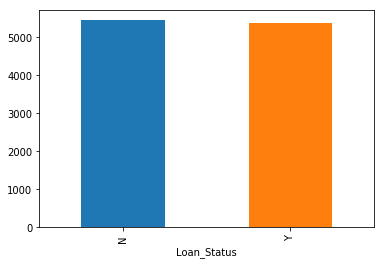

In [43]:
# Numerical Independent variables vs target variable
# We will try to find the mean income of people for which the loan has been approved vs the mean income of people
# for which the loan has not been approved.

train.groupby("Loan_Status")["ApplicantIncome"].mean().plot.bar()
plt.show()   # plot shows no difference in mean incomes between approved and not approved


In [44]:
train.ApplicantIncome.isna().sum()  # zero means:There are no null or missing values 

0

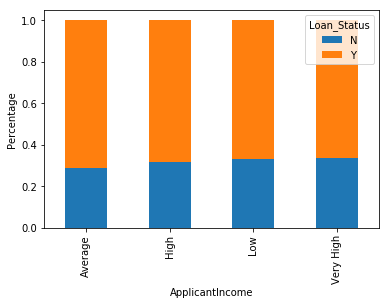

In [47]:
#let’s make bins for the applicant income variable based on the values in it and analyze the corresponding loan 
#status for each bin.

#bins=[0,2500,4000,6000,np.inf] 
#group=['Low','Average','High', 'Very high'] 
#train['Income_bin']=pd.cut(df['ApplicantIncome'],bins,labels=group) 
train["Income_bin"]=pd.Series([])

for i,income in enumerate(train.ApplicantIncome):
    if income >= 0 and income < 2500:
        train["Income_bin"][i]="Low"
    elif income >= 2500 and income < 4000:
        train["Income_bin"][i]="Average"
    elif income >= 4000 and income < 6000:
        train["Income_bin"][i]="High"
    else:  
        train["Income_bin"][i]="Very High"
    
Income_bin=pd.crosstab(train['Income_bin'],train['Loan_Status']) 
Income_bin.div(Income_bin.sum(1).astype(float), axis=0).plot(kind="bar", stacked=True) 
plt.xlabel('ApplicantIncome') 
P=plt.ylabel('Percentage')   #observation after bar chart: It can be inferred that Applicant income does not affect the
                             #chances of loan approval which contradicts our hypothesis in which we assumed that if 
                             #the applicant income is high the chances of loan approval will also be high.

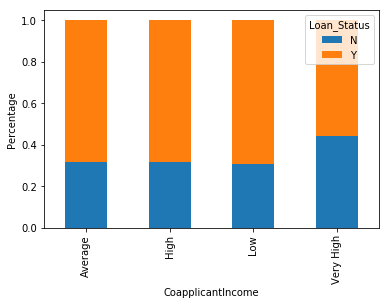

In [48]:
#We will analyze the coapplicant income and loan amount variable in similar manner.

#bins=[0,1000,3000,42000] 
#group=['Low','Average','High']
#train['Coapplicant_Income_bin']=pd.cut(df['CoapplicantIncome'],bins,labels=group)
train["Coapplicant_Income_bin"]=pd.Series([])

for i,income in enumerate(train.CoapplicantIncome):
    if income >= 0 and income < 2500:
        train["Coapplicant_Income_bin"][i]="Low"
    elif income >= 2500 and income < 4000:
        train["Coapplicant_Income_bin"][i]="Average"
    elif income >= 4000 and income < 6000:
        train["Coapplicant_Income_bin"][i]="High"
    else:  
        train["Coapplicant_Income_bin"][i]="Very High"


Coapplicant_Income_bin=pd.crosstab(train['Coapplicant_Income_bin'],train['Loan_Status']) 
Coapplicant_Income_bin.div(Coapplicant_Income_bin.sum(1).astype(float), axis=0).plot(kind="bar", stacked=True)
plt.xlabel('CoapplicantIncome') 
P = plt.ylabel('Percentage')


In [49]:
train.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status,Income_bin,Coapplicant_Income_bin
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y,High,Low
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N,High,Low
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y,Average,Low
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y,Average,Low
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y,Very High,Low


It shows that if coapplicant’s income is less the chances of loan approval are high. But this does not look right. The possible reason behind this may be that most of the applicants don’t have any coapplicant so the coapplicant income for such applicants is 0 and hence the loan approval is not dependent on it. So we can make a new variable in which we will combine the applicant’s and coapplicant’s income to visualize the combined effect of income on loan approval.

Let us combine the Applicant Income and Coapplicant Income and see the combined effect of Total Income on the Loan_Status.

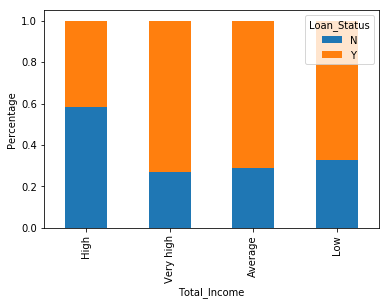

In [50]:
# Let us combine the Applicant Income and Coapplicant Income and see the combined effect of Total Income 
# on the Loan_Status.

train['Total_Income']=train['ApplicantIncome']+train['CoapplicantIncome']
bins=[0,2500,4000,6000,81000]
group=['Low','Average','High', 'Very high']
train['Total_Income_bin']=pd.cut(train['Total_Income'],bins,labels=group)
Total_Income_bin=pd.crosstab(train['Total_Income_bin'],train['Loan_Status']) 
Total_Income_bin.div(Total_Income_bin.sum(1).astype(float), axis=0).plot(kind="bar", stacked=True)
plt.xlabel('Total_Income') 
P = plt.ylabel('Percentage')

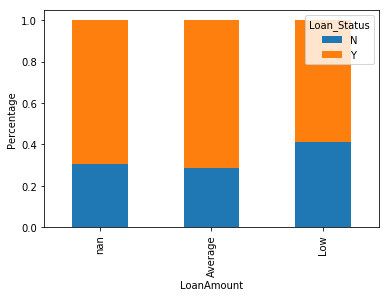

In [51]:
# Let’s visualize the Loan amount variable.

bins=[0,100,200,700] 
group=['Low','Average','High'] 
train['LoanAmount_bin']=pd.cut(df['LoanAmount'],bins,labels=group)
LoanAmount_bin=pd.crosstab(train['LoanAmount_bin'],train['Loan_Status'])
LoanAmount_bin.div(LoanAmount_bin.sum(1).astype(float), axis=0).plot(kind="bar", stacked=True)
plt.xlabel('LoanAmount')
P = plt.ylabel('Percentage')

#Let’s drop the bins which we created for the exploration part. We will change the 3+ in dependents variable to 3 to make it a numerical variable.We will also convert the target variable’s categories into 0 and 1 so that we can find its correlation with numerical variables. One more reason to do so is few models like logistic regression takes only numeric values as input. We will replace N with 0 and Y with 1.

In [52]:
train=train.drop(['Income_bin', 'Coapplicant_Income_bin', 'LoanAmount_bin', 'Total_Income_bin', 'Total_Income'], axis=1)
train['Dependents'].replace('3+', 3,inplace=True) 
test['Dependents'].replace('3+', 3,inplace=True)
train['Loan_Status'].replace('N', 0,inplace=True) 
train['Loan_Status'].replace('Y', 1,inplace=True)

### Now let us look at correlation between numeric variables. we will use the heatmap to visualize the correlation
# Heatmaps visualize the data through variations in coloring. The variables with darker color means their correlation is more.

                   ApplicantIncome  CoapplicantIncome  LoanAmount  \
ApplicantIncome           1.000000          -0.116605    0.570909   
CoapplicantIncome        -0.116605           1.000000    0.188619   
LoanAmount                0.570909           0.188619    1.000000   
Loan_Amount_Term         -0.045306          -0.059878    0.039447   
Credit_History           -0.014715          -0.002056   -0.008433   
Loan_Status              -0.004710          -0.059187   -0.037318   

                   Loan_Amount_Term  Credit_History  Loan_Status  
ApplicantIncome           -0.045306       -0.014715    -0.004710  
CoapplicantIncome         -0.059878       -0.002056    -0.059187  
LoanAmount                 0.039447       -0.008433    -0.037318  
Loan_Amount_Term           1.000000        0.001470    -0.021268  
Credit_History             0.001470        1.000000     0.561678  
Loan_Status               -0.021268        0.561678     1.000000  


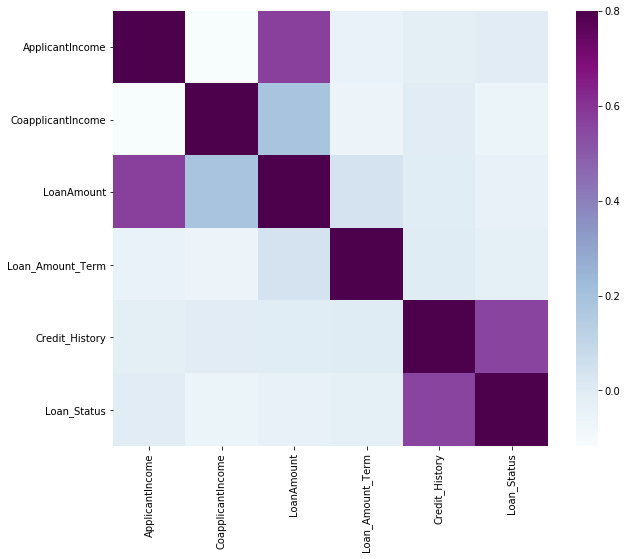

In [53]:
matrix=train.corr()
print(matrix)
plt.figure(figsize=(10,8))
sns.heatmap(matrix, vmax=.8, square=True, cmap="BuPu")


### After exploring all the variables in our data, we can now impute the missing values and treat the outliers 
because missing data and outliers can have adverse effect on the model performance.

Missing value imputation
Let’s list out feature-wise count of missing values.

In [54]:
train.isnull().sum()

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

### There are missing values in Gender, Married, Dependents, Self_Employed, LoanAmount, Loan_Amount_Term and Credit_History features.

We will treat the missing values in all the features one by one.

We can consider these methods to fill the missing values:

For numerical variables: imputation using mean or median
For categorical variables: imputation using mode

In [55]:
train['Gender'].fillna(train['Gender'].mode()[0], inplace=True) 
train['Married'].fillna(train['Married'].mode()[0], inplace=True)
train['Dependents'].fillna(train['Dependents'].mode()[0], inplace=True) 
train['Self_Employed'].fillna(train['Self_Employed'].mode()[0], inplace=True)
train['Credit_History'].fillna(train['Credit_History'].mode()[0], inplace=True)

In [56]:
train["Loan_Amount_Term"].value_counts()

360.0    512
180.0     44
480.0     15
300.0     13
84.0       4
240.0      4
120.0      3
36.0       2
60.0       2
12.0       1
Name: Loan_Amount_Term, dtype: int64

In [57]:
#It can be seen that in loan amount term variable, the value of 360 is repeating the most. 
#So we will replace the missing values in this variable using the mode of this variable.

train['Loan_Amount_Term'].fillna(train['Loan_Amount_Term'].mode()[0], inplace=True)

Now we will see the LoanAmount variable. As it is a numerical variable, we can use mean or median to impute the missing
values. We will use median to fill the null values as earlier we saw that loan amount have outliers so the mean will
not be the proper approach as it is highly affected by the presence of outliers.

In [58]:
train['LoanAmount'].fillna(train['LoanAmount'].median(), inplace=True)

In [59]:
train.isnull().sum()

Loan_ID              0
Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64

In [60]:
#As we can see that all the missing values have been filled in the test dataset. Let’s fill all the missing values
#in the test dataset too with the same approach.

test['Gender'].fillna(train['Gender'].mode()[0], inplace=True)
test['Dependents'].fillna(train['Dependents'].mode()[0], inplace=True)
test['Self_Employed'].fillna(train['Self_Employed'].mode()[0], inplace=True) 
test['Credit_History'].fillna(train['Credit_History'].mode()[0], inplace=True)
test['Loan_Amount_Term'].fillna(train['Loan_Amount_Term'].mode()[0], inplace=True) 
test['LoanAmount'].fillna(train['LoanAmount'].median(), inplace=True)

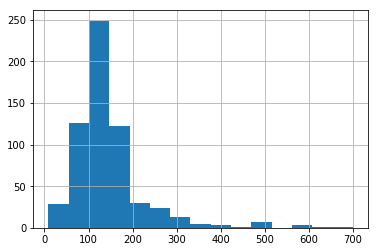

In [61]:
train["LoanAmount"].hist(bins=15)
#train["ApplicantIncome"].hist(bins=15)

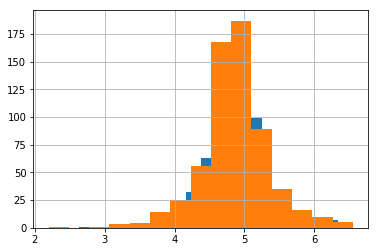

In [62]:
#Outlier treatment
train['LoanAmount_log'] = np.log(train['LoanAmount']) 
train['LoanAmount_log'].hist(bins=20) 
test['LoanAmount_log'] = np.log(test['LoanAmount'])
train["LoanAmount_log"].hist(bins=15)



In [63]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 14 columns):
Loan_ID              614 non-null object
Gender               614 non-null object
Married              614 non-null object
Dependents           614 non-null object
Education            614 non-null object
Self_Employed        614 non-null object
ApplicantIncome      614 non-null int64
CoapplicantIncome    614 non-null float64
LoanAmount           614 non-null float64
Loan_Amount_Term     614 non-null float64
Credit_History       614 non-null float64
Property_Area        614 non-null object
Loan_Status          614 non-null int64
LoanAmount_log       614 non-null float64
dtypes: float64(5), int64(2), object(7)
memory usage: 67.2+ KB


#Now the distribution looks much closer to normal and effect of extreme values has been significantly subsided. 
#Let’s build a logistic regression model and make predictions for the test dataset.

# Model building

In [64]:
#Lets drop the Loan_ID variable as it do not have any effect on the loan status. 
#We will do the same changes to the test dataset which we did for the training dataset.

train=train.drop(columns=["Loan_ID"])
test=test.drop(columns=["Loan_ID"])

In [72]:
#Sklearn requires the target variable in a separate dataset. So, we will drop our target variable from the train
#dataset and save it in another dataset.

X = train.drop(columns=["Loan_Status"]) 
y = train.Loan_Status
print(X.head())

   ApplicantIncome  CoapplicantIncome  LoanAmount  Loan_Amount_Term  \
0             5849                0.0       128.0             360.0   
1             4583             1508.0       128.0             360.0   
2             3000                0.0        66.0             360.0   
3             2583             2358.0       120.0             360.0   
4             6000                0.0       141.0             360.0   

   Credit_History  LoanAmount_log  Gender_Female  Gender_Male  Married_No  \
0             1.0        4.852030              0            1           1   
1             1.0        4.852030              0            1           0   
2             1.0        4.189655              0            1           0   
3             1.0        4.787492              0            1           0   
4             1.0        4.948760              0            1           1   

   Married_Yes         ...           Dependents_0  Dependents_1  Dependents_2  \
0            0         ...   

In [73]:
# Let us make dummy variables for categorical variables
X=pd.get_dummies(X) 
train=pd.get_dummies(train) 
test=pd.get_dummies(test)

In [74]:
print(X.shape)
print(train.shape)
print(test.shape)

(614, 21)
(614, 22)
(367, 21)


Now we will train the model on training dataset and make predictions for the test dataset. But can we validate these
predictions? One way of doing this is we can divide our train dataset into two parts: train and validation. We can
train the model on this train part and using that make predictions for the validation part. In this way we can 
validate our predictions as we have the true predictions for the validation part (which we do not have for the test dataset)          

In [75]:
from sklearn.model_selection import train_test_split
x_train, x_cv, y_train, y_cv = train_test_split(X,y, test_size =0.3)

In [76]:
#The dataset has been divided into training and validation part. Let us import LogisticRegression and accuracy_score
#from sklearn and fit the logistic regression model.

from sklearn.linear_model import LogisticRegression 
from sklearn.metrics import accuracy_score
model = LogisticRegression() 
model.fit(x_train, y_train)

#Here the C parameter represents inverse of regularization strength. Regularization is applying a penalty to
#increasing the magnitude of parameter values in order to reduce overfitting. Smaller values of C specify stronger
#regularization. 

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [77]:
#Let’s predict the Loan_Status for validation set and calculate its accuracy.

pred_cv = model.predict(x_cv)


In [78]:
#Let us calculate how accurate our predictions are by calculating the accuracy.

accuracy_score(y_cv,pred_cv)


0.8378378378378378

In [79]:
#Let’s make predictions for the test dataset.

pred_test = model.predict(test)

In [80]:
#Lets import the submission file which we have to submit on the solution checker.

submission=pd.read_csv("C:\\Data Science\\Projects\\Loan Prediction-Analytics Vidhya\\Sample_Submission_loan.csv")

In [81]:
submission

,Loan_ID,Loan_Status


In [82]:
submission["Loan_ID"]=test_original["Loan_ID"]
submission["Loan_Status"]=pred_test

In [83]:
submission.head(20)

,Loan_ID,Loan_Status
0,LP001015,1
1,LP001022,1
2,LP001031,1
3,LP001035,1
4,LP001051,1
5,LP001054,1
6,LP001055,1
7,LP001056,0
8,LP001059,1
9,LP001067,1


In [84]:
#Remember we need predictions in Y and N. So let’s convert 1 and 0 to Y and N.
submission.Loan_Status.where(submission.Loan_Status==1,"N",inplace=True)
submission.Loan_Status.where(submission.Loan_Status=="N","Y",inplace=True)

#remember, we can also use Replace as mentioned below:
#submission['Loan_Status'].replace(0, 'N',inplace=True) 
#submission['Loan_Status'].replace(1, 'Y',inplace=True)

In [85]:
submission.head(20)

,Loan_ID,Loan_Status
0,LP001015,Y
1,LP001022,Y
2,LP001031,Y
3,LP001035,Y
4,LP001051,Y
5,LP001054,Y
6,LP001055,Y
7,LP001056,N
8,LP001059,Y
9,LP001067,Y


In [86]:
submission.to_csv("C:\\Data Science\\Projects\\Loan Prediction-Analytics Vidhya\\logistic.csv",index=False)

In [87]:
##Stratified K-fold cross validation
from sklearn.model_selection import StratifiedKFold

i=1 
kf = StratifiedKFold(n_splits=5,random_state=1,shuffle=True)
for train_index,test_index in kf.split(X,y): 
    print('\n{} of kfold {}'.format(i,kf.n_splits))
    xtr,xvl = X.loc[train_index],X.loc[test_index]   
    ytr,yvl = y[train_index],y[test_index]      
    model = LogisticRegression(random_state=1) 
    model.fit(xtr, ytr)    
    pred_test = model.predict(xvl) 
    score = accuracy_score(yvl,pred_test)  
    print('accuracy_score',score)   
    i+=1

    
    


1 of kfold 5
accuracy_score 0.7983870967741935

2 of kfold 5
accuracy_score 0.8306451612903226

3 of kfold 5
accuracy_score 0.8114754098360656

4 of kfold 5
accuracy_score 0.7950819672131147

5 of kfold 5
accuracy_score 0.8278688524590164


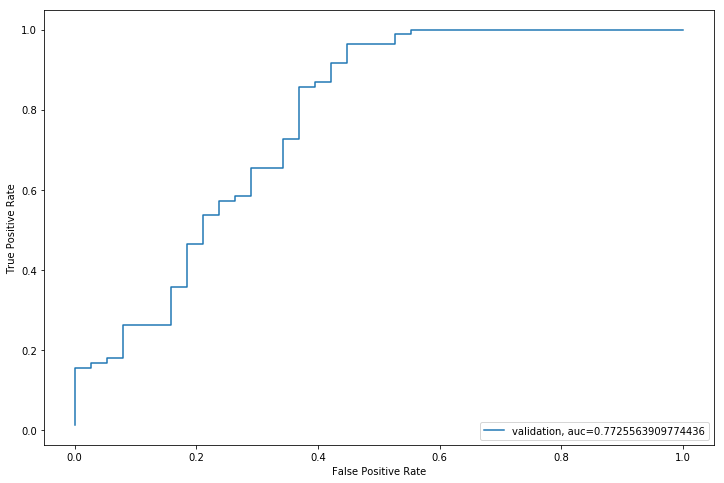

In [88]:
pred_test = model.predict(test) 
pred=model.predict_proba(xvl)[:,1]

from sklearn import metrics
fpr,tpr,_=metrics.roc_curve(yvl,pred)
auc=metrics.roc_auc_score(yvl,pred)
plt.figure(figsize=(12,8)) 
plt.plot(fpr,tpr,label="validation, auc="+str(auc)) 
plt.xlabel('False Positive Rate') 
plt.ylabel('True Positive Rate')
plt.legend(loc=4) 
plt.show()


In [89]:
submission['Loan_Status']=pred_test
submission['Loan_ID']=test_original['Loan_ID']
submission['Loan_Status'].replace(0, 'N',inplace=True) 
submission['Loan_Status'].replace(1, 'Y',inplace=True)

In [90]:
submission.to_csv("C:\\Data Science\\Projects\\Loan Prediction-Analytics Vidhya\\Logistic.csv",index=False)

### Feature Engineering:
    Total Income - As discussed during bivariate analysis we will combine the Applicant Income and Coapplicant Income. If the total income is high, chances of loan approval might also be high.
  
    EMI - EMI is the monthly amount to be paid by the applicant to repay the loan. Idea behind making this variable is that people who have high EMI’s might find it difficult to pay back the loan. We can calculate the EMI by taking the ratio of loan amount with respect to loan amount term.
    
    Balance Income - This is the income left after the EMI has been paid. Idea behind creating this variable is that if this value is high, the chances are high that a person will repay the loan and hence increasing the chances of loan approval.

In [91]:
train['Total_Income']=train['ApplicantIncome']+train['CoapplicantIncome'] 
test['Total_Income']=test['ApplicantIncome']+test['CoapplicantIncome']

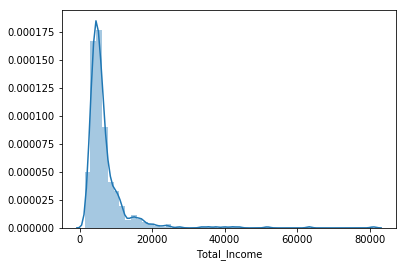

In [92]:
#Let us check the distribution of total income:
sns.distplot(train["Total_Income"])

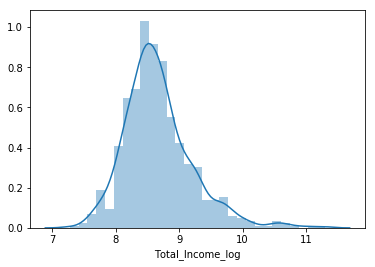

In [93]:
###We can see it is shifted towards left, i.e., the distribution is right skewed. So, let’s take the 
##log transformation to make the distribution normal and make sure all those extreme values are subsided

train['Total_Income_log'] = np.log(train['Total_Income']) 
sns.distplot(train['Total_Income_log']); 
test['Total_Income_log'] = np.log(test['Total_Income'])

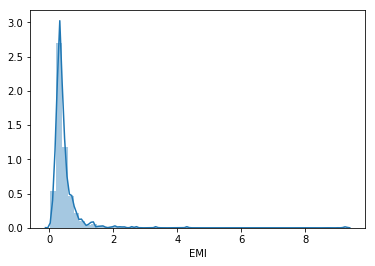

In [94]:
# Let us create the EMI feature now
train['EMI']=train['LoanAmount']/train['Loan_Amount_Term'] 
test['EMI']=test['LoanAmount']/test['Loan_Amount_Term']

#Let’s check the distribution of EMI variable.

sns.distplot(train['EMI']);

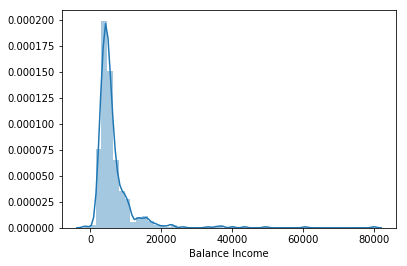

In [95]:
#Let us create Balance Income feature now and check its distribution. ###Kota has doubt here..why to multiply with 1000

train['Balance Income']=train['Total_Income']-(train['EMI']*1000) # Multiply with 1000 to make the units equal
test['Balance Income']=test['Total_Income']-(test['EMI']*1000)
sns.distplot(train['Balance Income']);

In [96]:
#Let us now drop the variables which we used to create these new features.
#Reason for doing this is, the correlation between those old features and these new features will be very high 
#and logistic regression assumes that the variables are not highly correlated. We also wants to remove the noise
#from the dataset, so removing correlated features will help in reducing the noise too.

train=train.drop(['ApplicantIncome', 'CoapplicantIncome', 'LoanAmount', 'Loan_Amount_Term'], axis=1) 
test=test.drop(['ApplicantIncome', 'CoapplicantIncome', 'LoanAmount', 'Loan_Amount_Term'], axis=1)

In [97]:
train.head()

,Credit_History,Loan_Status,LoanAmount_log,Gender_Female,Gender_Male,Married_No,Married_Yes,Dependents_3,Dependents_0,Dependents_1,...,Education_Not Graduate,Self_Employed_No,Self_Employed_Yes,Property_Area_Rural,Property_Area_Semiurban,Property_Area_Urban,Total_Income,Total_Income_log,EMI,Balance Income
0,1.0,1,4.852030,0,1,1,0,0,1,0,...,0,1,0,0,0,1,5849.0,8.674026,0.355556,5493.444444
1,1.0,0,4.852030,0,1,0,1,0,0,1,...,0,1,0,1,0,0,6091.0,8.714568,0.355556,5735.444444
2,1.0,1,4.189655,0,1,0,1,0,1,0,...,0,0,1,0,0,1,3000.0,8.006368,0.183333,2816.666667
3,1.0,1,4.787492,0,1,0,1,0,1,0,...,1,1,0,0,0,1,4941.0,8.505323,0.333333,4607.666667
4,1.0,1,4.948760,0,1,1,0,0,1,0,...,0,1,0,0,0,1,6000.0,8.699515,0.391667,5608.333333


### Model building part 2

In [98]:
X=train.drop(columns=["Loan_Status"])
y=train.Loan_Status

In [99]:
i=1 
kf = StratifiedKFold(n_splits=5,random_state=1,shuffle=True) 
for train_index,test_index in kf.split(X,y):     
    print('\n{} of kfold {}'.format(i,kf.n_splits))     
    xtr,xvl = X.loc[train_index],X.loc[test_index]     
    ytr,yvl = y[train_index],y[test_index]         

    model = LogisticRegression(random_state=1)     
    model.fit(xtr, ytr)     
    pred_test = model.predict(xvl)     
    score = accuracy_score(yvl,pred_test)     
    print('accuracy_score',score)     
    i+=1 
    pred_test = model.predict(test) 
    pred=model.predict_proba(xvl)[:,1]


1 of kfold 5
accuracy_score 0.7983870967741935

2 of kfold 5
accuracy_score 0.8225806451612904

3 of kfold 5
accuracy_score 0.7786885245901639

4 of kfold 5
accuracy_score 0.7868852459016393

5 of kfold 5
accuracy_score 0.8278688524590164


In [100]:
# The mean validation accuracy for the above model is 0.812

submission['Loan_Status']=pred_test # filling Loan_Status with predictions 
submission['Loan_ID']=test_original['Loan_ID'] # filling Loan_ID with test Loan_ID
# replacing 0 and 1 with N and Y 
submission['Loan_Status'].replace(0, 'N',inplace=True) 
submission['Loan_Status'].replace(1, 'Y',inplace=True)
# Converting submission file to .csv format 
pd.DataFrame(submission, columns=['Loan_ID','Loan_Status']).to_csv("C:\\Data Science\\Projects\\Loan Prediction-Analytics Vidhya\\Log2.csv",index=False)

# From above submission we got an accuracy of 0.7847 on the leaderboard. 
##So we can infer feature engineering has not improved the model. Let us look at some other algorithms.

In [101]:
### Let’s fit the decision tree model with 5 folds of cross validation.

from sklearn.tree import DecisionTreeClassifier
i=1 
kf = StratifiedKFold(n_splits=5,random_state=1,shuffle=True) 
for train_index,test_index in kf.split(X,y): 
    print('\n{} of kfold {}'.format(i,kf.n_splits))     
    xtr,xvl = X.loc[train_index],X.loc[test_index]     
    ytr,yvl = y[train_index],y[test_index]         
    model = DecisionTreeClassifier(random_state=1)     
    model.fit(xtr, ytr)     
    pred_test = model.predict(xvl)     
    score = accuracy_score(yvl,pred_test)     
    print('accuracy_score',score)     
    i+=1 
pred_test = model.predict(test)


1 of kfold 5
accuracy_score 0.7258064516129032

2 of kfold 5
accuracy_score 0.7419354838709677

3 of kfold 5
accuracy_score 0.7049180327868853

4 of kfold 5
accuracy_score 0.680327868852459

5 of kfold 5
accuracy_score 0.7049180327868853


In [102]:
# The mean validation score for the above Decision Tree accuracy model is:0.69
submission['Loan_Status']=pred_test   # filling Loan_Status with predictions 
submission['Loan_ID']=test_original['Loan_ID'] # filling Loan_ID with test Loan_ID
# replacing 0 and 1 with N and Y 
submission['Loan_Status'].replace(0, 'N',inplace=True) 
submission['Loan_Status'].replace(1, 'Y',inplace=True)
# Converting submission file to .csv format 
pd.DataFrame(submission, columns=['Loan_ID','Loan_Status']).to_csv("C:\\Data Science\\Projects\\Loan Prediction-Analytics Vidhya\\Decision Tree.csv",index=False)


##### Random Forest
RandomForest is a tree based bootstrapping algorithm wherein a certain no. of weak learners (decision trees) are combined to make a powerful prediction model.
For every individual learner, a random sample of rows and a few randomly chosen variables are used to build a decision tree model.
Final prediction can be a function of all the predictions made by the individual learners.
In case of regression problem, the final prediction can be mean of all the predictions.

In [103]:
from sklearn.ensemble import RandomForestClassifier
i=1 
kf = StratifiedKFold(n_splits=5,random_state=1,shuffle=True) 
for train_index,test_index in kf.split(X,y): 
    print('\n{} of kfold {}'.format(i,kf.n_splits))     
    xtr,xvl = X.loc[train_index],X.loc[test_index]     
    ytr,yvl = y[train_index],y[test_index]         
    model = RandomForestClassifier(n_estimators=10,random_state=1,max_depth=10)  
    model.fit(xtr, ytr)     
    pred_test = model.predict(xvl)     
    score = accuracy_score(yvl,pred_test)     
    print('accuracy_score',score)     
    i+=1 
pred_test = model.predict(test)


1 of kfold 5
accuracy_score 0.8225806451612904

2 of kfold 5
accuracy_score 0.8145161290322581

3 of kfold 5
accuracy_score 0.7377049180327869

4 of kfold 5
accuracy_score 0.7295081967213115

5 of kfold 5
accuracy_score 0.8114754098360656


####The mean validation accuracy for the above RandomForest using k-fold cross validation model is 0.766

We will try to improve the accuracy by tuning the hyperparameters for this model. We will use grid search to get the optimized values of hyper parameters. Grid-search is a way to select the best of a family of hyper parameters, parametrized by a grid of parameters.

We will tune the max_depth and n_estimators parameters. max_depth decides the maximum depth of the tree and n_estimators decides the number of trees that will be used in random forest model.

In [104]:
from sklearn.model_selection import GridSearchCV
# Provide range for max_depth from 1 to 20 with an interval of 2 and from 1 to 200 with an interval of 20 
#for n_estimators 
paramgrid = {'max_depth': list(range(1, 20, 2)), 'n_estimators': list(range(1, 200, 20))}
grid_search=GridSearchCV(RandomForestClassifier(random_state=1),paramgrid)

from sklearn.model_selection import train_test_split 
x_train, x_cv, y_train, y_cv = train_test_split(X,y, test_size =0.3, random_state=1)
# Fit the grid search model 
grid_search.fit(x_train,y_train)


GridSearchCV(cv=None, error_score='raise',
       estimator=RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=1,
            oob_score=False, random_state=1, verbose=0, warm_start=False),
       fit_params=None, iid=True, n_jobs=1,
       param_grid={'max_depth': [1, 3, 5, 7, 9, 11, 13, 15, 17, 19], 'n_estimators': [1, 21, 41, 61, 81, 101, 121, 141, 161, 181]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=None, verbose=0)

In [105]:
print(grid_search.best_estimator_)
print(grid_search.best_score_)
print(grid_search.best_params_)



RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=3, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=141, n_jobs=1,
            oob_score=False, random_state=1, verbose=0, warm_start=False)
0.8181818181818182
{'max_depth': 3, 'n_estimators': 141}


#So, the optimized value for the max_depth variable is 3 and for n_estimator is 141. 
#Now let’s build the model using these optimized values.

In [106]:
from sklearn.ensemble import RandomForestClassifier
i=1 
kf = StratifiedKFold(n_splits=5,random_state=1,shuffle=True) 
for train_index,test_index in kf.split(X,y): 
    print('\n{} of kfold {}'.format(i,kf.n_splits))     
    xtr,xvl = X.loc[train_index],X.loc[test_index]     
    ytr,yvl = y[train_index],y[test_index]         
    model = RandomForestClassifier(n_estimators=141,random_state=1,max_depth=3)  
    model.fit(xtr, ytr)     
    pred_test = model.predict(xvl)     
    score = accuracy_score(yvl,pred_test)     
    print('accuracy_score',score)     
    i+=1 
pred_test = model.predict(test)


1 of kfold 5
accuracy_score 0.8064516129032258

2 of kfold 5
accuracy_score 0.8306451612903226

3 of kfold 5
accuracy_score 0.8032786885245902

4 of kfold 5
accuracy_score 0.7950819672131147

5 of kfold 5
accuracy_score 0.8278688524590164


In [107]:
# The mean validation score for the above Decision Tree accuracy model is:0.69
submission['Loan_Status']=pred_test   # filling Loan_Status with predictions 
submission['Loan_ID']=test_original['Loan_ID'] # filling Loan_ID with test Loan_ID
# replacing 0 and 1 with N and Y 
submission['Loan_Status'].replace(0, 'N',inplace=True) 
submission['Loan_Status'].replace(1, 'Y',inplace=True)
# Converting submission file to .csv format 
pd.DataFrame(submission, columns=['Loan_ID','Loan_Status']).to_csv("C:\\Data Science\\Projects\\Loan Prediction-Analytics Vidhya\\Random Forest.csv",index=False)


In [108]:
#Let us find the feature importance now, i.e. which features are most important for this problem.
#We will use feature_importances_ attribute of sklearn to do so.
print(model.n_features_)
print(model.feature_importances_)

21
[0.40634793 0.05281727 0.00647171 0.00400651 0.01502039 0.00675712
 0.00627742 0.00661578 0.00634471 0.00575867 0.01756791 0.00884113
 0.00512209 0.00577545 0.02202569 0.07080828 0.00451526 0.09090284
 0.10944178 0.05794886 0.09063319]


<BarContainer object of 21 artists>

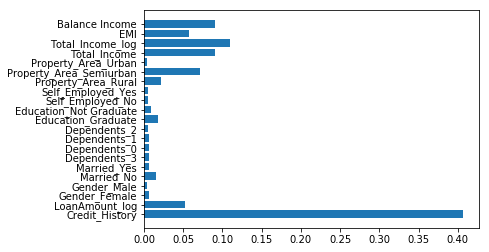

In [109]:
cols=X.columns
plt.Figure(figsize=(12,12))
plt.barh(cols,model.feature_importances_)

###We can see that Credit_History is the most important feature followed by Balance Income, Total Income, EMI. 
###So, feature engineering helped us in predicting our target variable.